<a href="https://colab.research.google.com/github/bmounikareddy98/Machine-learning-assignments/blob/main/Copy_of_Multiple_linear_regression(gradient_descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [22]:
url = 'https://raw.githubusercontent.com/bmounikareddy98/Machine-learning-assignments/main/insurance.csv'
dataset = pd.read_csv(url)
dataset=dataset.dropna()
dataset = dataset.drop_duplicates()
print(dataset.head())

      sex smoker     region  children     bmi  age      charges
0  female    yes  southwest         0  27.900   19  16884.92400
1    male     no  southeast         1  33.770   18   1725.55230
2    male     no  southeast         3  33.000   28   4449.46200
3    male     no  northwest         0  22.705   33  21984.47061
4    male     no  northwest         0  28.880   32   3866.85520


In [23]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print(X.shape)
print(Y.shape)
print(X[5])
#print(Y[5])
print(type(dataset))


(1337, 6)
(1337,)
['female' 'no' 'southeast' 0 25.74 31]
<class 'pandas.core.frame.DataFrame'>


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 1]= labelencoder.fit_transform(X[:, 1])
X[:, 2]= labelencoder.fit_transform(X[:, 2])
print(X)

[[0 1 3 0 27.9 19]
 [1 0 2 1 33.77 18]
 [1 0 2 3 33.0 28]
 ...
 [0 0 2 0 36.85 18]
 [0 0 3 0 25.8 21]
 [0 1 1 0 29.07 61]]


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


print(X[1])
#print(X.shape)

[0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1 33.77 18]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1069, 11)
(1069,)
(268, 11)
(268,)


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:, 8:11] = sc.fit_transform(X_train[:, 8:11])
X_test[:, 8:11] = sc.transform(X_test[:, 8:11])
Y_train = Y_train.reshape(-1, 1)
Y_train = sc.fit_transform(Y_train)
Y_test = Y_test.reshape(-1, 1)
Y_test = sc.fit_transform(Y_test)
print(X_train[0])
print(X_test[0])
print(Y_train)
print(Y_train.shape)
print(X_train.shape)

[0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.5855501703442823 0.4141157157741812
 1.489406518534078]
[1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 -0.9205412028908647 1.3864435332426208
 0.34555087249183136]
[[ 0.02352913]
 [-0.0505176 ]
 [-0.34135011]
 ...
 [-0.97548154]
 [ 0.47423484]
 [ 2.88308022]]
(1069, 1)
(1069, 11)


In [29]:
print(X_train.shape)
print(Y_train.shape)

(1069, 11)
(1069, 1)


In [30]:
def  cal_cost(theta,X,Y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(Y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-Y))
    return cost

In [31]:
def gradient_descent(X,Y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(Y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,12))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - Y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,Y)
        
    return theta, cost_history, theta_history

In [32]:
lr =0.01
n_iter = 1000

theta = np.random.randn(12,1)

X_b = np.c_[np.ones((len(X_train),1)),X_train]
theta,cost_history,theta_history = gradient_descent(X_b,Y_train,theta,lr,n_iter)

sum=theta[0][0]
y_pred= np.ones(Y_train.shape)
for i in range(0, X_train.shape[0]):
  sum+= theta[1][0]*X_train[i][0]+theta[2][0]*X_train[i][1]+theta[3][0]*X_train[i][2]+theta[4][0]*X_train[i][3]+theta[5][0]*X_train[i][4]+theta[6][0]*X_train[i][5]+theta[7][0]*X_train[i][6]+theta[8][0]*X_train[i][7]+theta[9][0]*X_train[i][8]+theta[10][0]*X_train[i][9]+theta[11][0]*X_train[i][10]
  y_pred[i][0]=sum;
  sum=theta[0][0]
sum=theta[0][0]
y_test_pred= np.ones(Y_test.shape)
for i in range(0, X_test.shape[0]):
  sum+= theta[1][0]*X_test[i][0]+theta[2][0]*X_test[i][1]+theta[3][0]*X_test[i][2]+theta[4][0]*X_test[i][3]+theta[5][0]*X_test[i][4]+theta[6][0]*X_test[i][5]+theta[7][0]*X_test[i][6]+theta[8][0]*X_test[i][7]+theta[9][0]*X_test[i][8]+theta[10][0]*X_test[i][9]+theta[11][0]*X_test[i][10]
  y_test_pred[i][0]=sum;
  sum=theta[0][0]



"""print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))"""


"print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))\nprint('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))"

In [14]:
import sklearn.metrics
import math
mse = sklearn.metrics.mean_squared_error(Y_train, y_pred)

rmse = math.sqrt(mse)
#rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2t = r2_score(Y_train, y_pred)
print(rmse)
print(r2t)

mse_test = sklearn.metrics.mean_squared_error(Y_test, y_test_pred)

rmse_test = math.sqrt(mse_test)
#rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2t_test = r2_score(Y_test, y_test_pred)
print(rmse_test)
print(r2t_test)



0.5127530823486376
0.7370842765419713
0.5470448416526617
0.7007419412212144


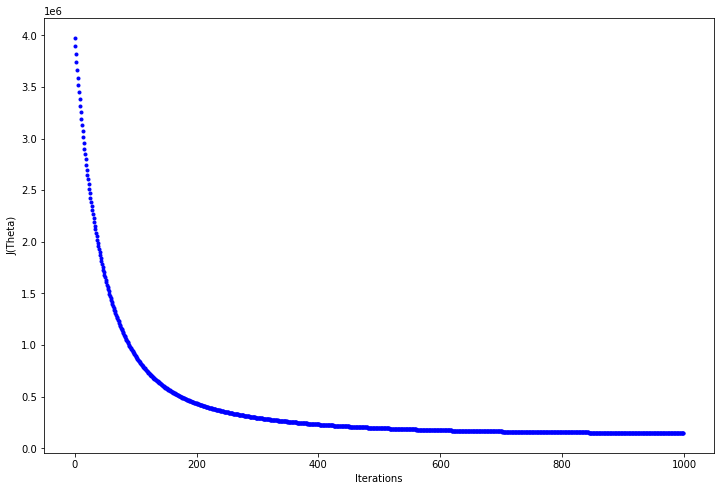

In [33]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')


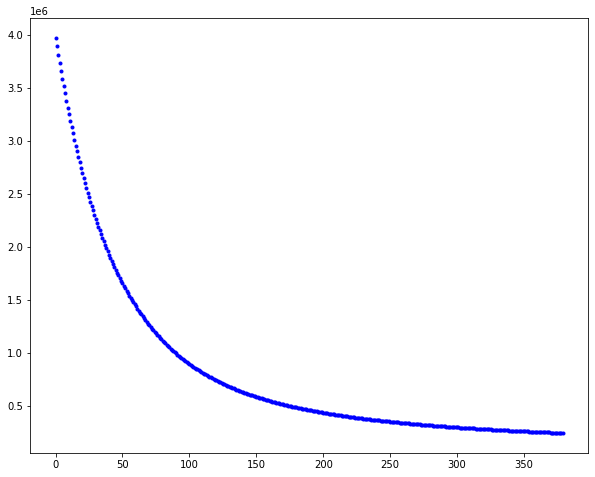

In [34]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(380),cost_history[:380],'b.')

In [42]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X_train,Y_train,'b.')
     theta = np.random.randn(12,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,Y_train, theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

ValueError: ignored

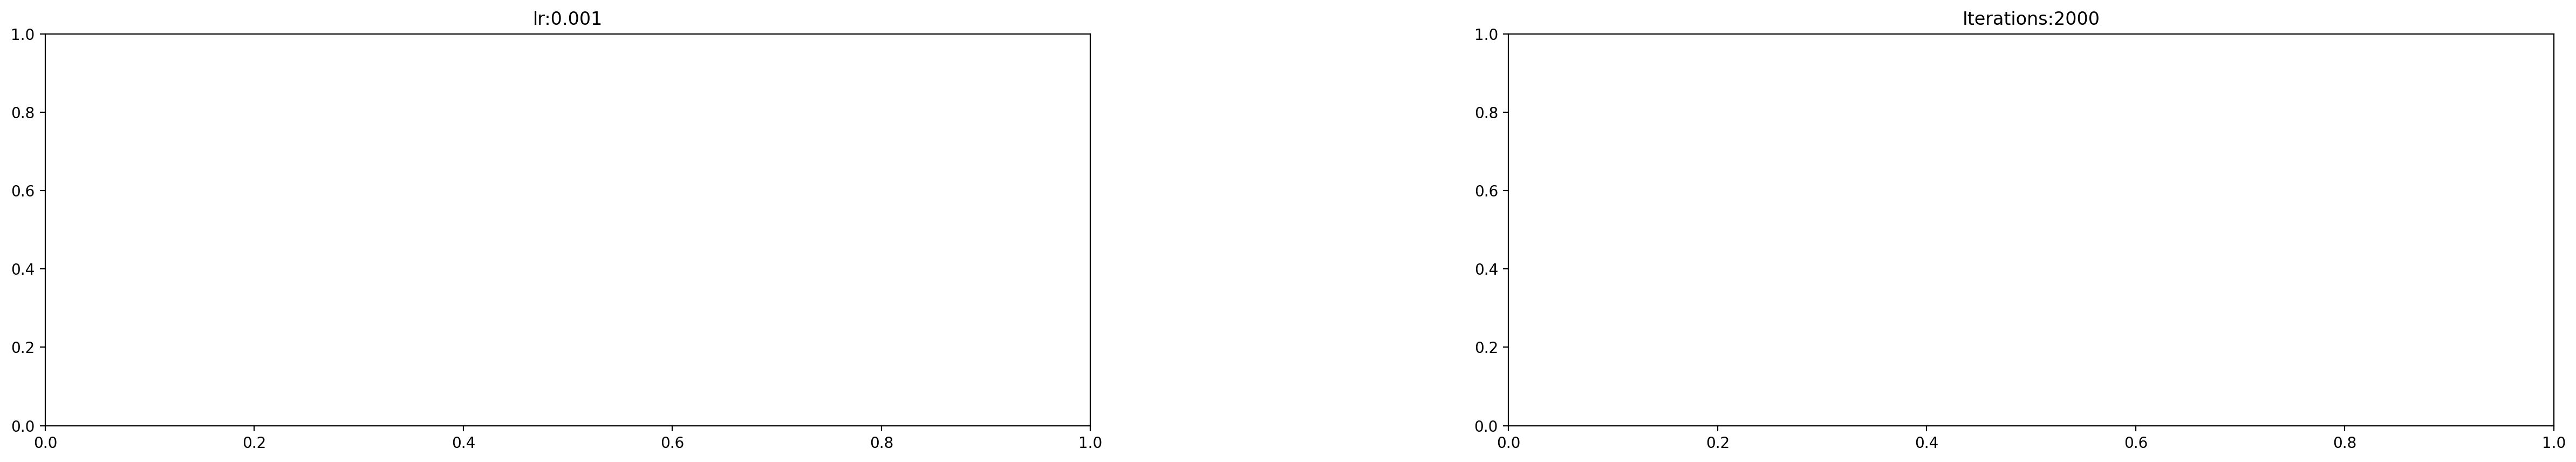

In [43]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

In [ ]:
def stocashtic_gradient_descent(X,Y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(Y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            Y_i = Y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - Y_i)))
            cost += cal_cost(theta,X_i,Y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [ ]:
lr =0.5
n_iter = 100

theta = np.random.randn(12,1)

X_b = np.c_[np.ones((len(X_train),1)),X_train]
theta,cost_history = stocashtic_gradient_descent(X_b,Y_train,theta,lr,n_iter)
print(theta.shape)
print(X_train.shape)

sum=theta[0][0]
y_pred= np.ones(Y_train.shape)
for i in range(0, X_train.shape[0]):
  sum+= theta[1][0]*X_train[i][0]+theta[2][0]*X_train[i][1]+theta[3][0]*X_train[i][2]+theta[4][0]*X_train[i][3]+theta[5][0]*X_train[i][4]+theta[6][0]*X_train[i][5]
  y_pred[i][0]=sum;
  sum=theta[0][0]

 


#print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0],theta[3][0],theta[4][0],theta[5][0],theta[6][0]))

"""for i in range(0,7):
  print(theta[i][0])
print('Final cost/MSE:  {:0.3f}'.format(np.sqrt(np.sqrt(cost_history[-1]))))
"""


(12, 1)
(1069, 11)


"for i in range(0,7):\n  print(theta[i][0])\nprint('Final cost/MSE:  {:0.3f}'.format(np.sqrt(np.sqrt(cost_history[-1]))))\n"

In [ ]:
"""s=(X_train.shape[0], 1)
w0=np.ones(s)
#X_new= w0
#X_new= np.concatenate((w0,X_train))
X_train = np.insert(X_train, 0, w0, axis=1)
print(X_train.shape)
#print(w0)
s=(X_train.shape[0],1)
ones=np.ones(s)
X_train= np.concatenate((ones,X_train), axis=1)
print(X_train.shape)"""
print(Y_train.shape)
print(y_pred.shape)
print(y_pred[0], Y_train[0])
#print(Y_train)

(1069, 1)
(1069, 1)
[0.0489271] [0.02352913]


In [ ]:
#y_train_predict=regressor.predict(X_test)\

import sklearn.metrics
import math
mse = sklearn.metrics.mean_squared_error(Y_train, y_pred)

rmse = math.sqrt(mse)
#rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2t = r2_score(Y_train, y_pred)
print(rmse)
print(r2t)

0.7142885219607731
0.48979190739509426
